In [1]:
# Import libraries
import numpy as np
import collections
import datetime
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import sklearn.linear_model as sk
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline

/Users/JohnBowers/anaconda/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [32]:
# Load cleaned data from Dropbox
df = pd.read_csv('https://www.dropbox.com/s/80ya9insucxch7e/cleaned_data.csv?dl=1', index_col=0) 
# print some data to examine
df.head(n=5)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


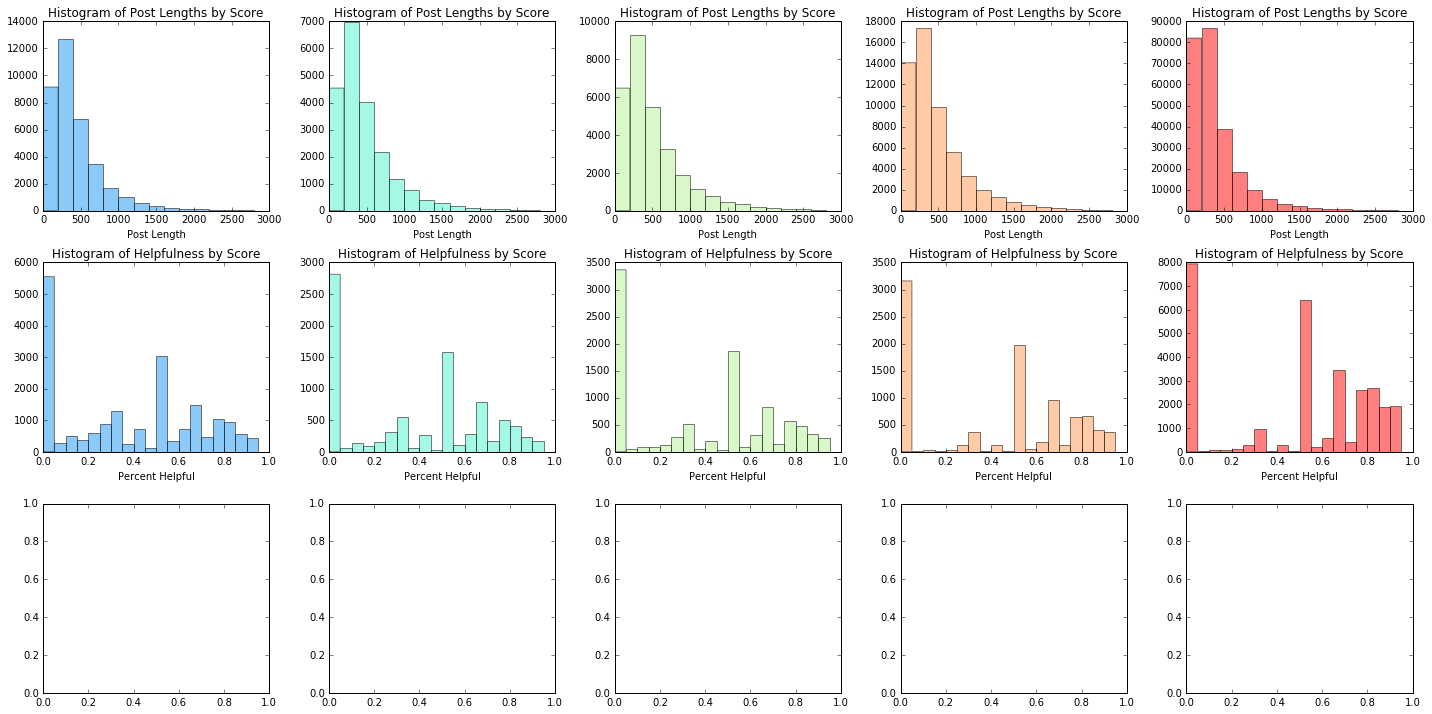

In [45]:
fig, ax = plt.subplots(3, 5, figsize=(20, 10))

### Histograms by Score (color-coded by score)
groups = 6
#set up color map (one color per group number)
#split [0, 1] in to as many parts as there are groups
group_numbers = np.linspace(0, 1, groups) 
#get a color map
c_map = plt.get_cmap("rainbow") 
#get a range of colors from color map
c_norm  = colors.Normalize(vmin = 0, vmax = group_numbers[-1])
#get a map that maps a group number to a color
number_map = cmx.ScalarMappable(norm = c_norm, cmap = c_map)

# Histograms for each score (in case people write longer posts for very good/bad items)
for score in xrange(1, groups):
    
    # convert a group number into a color using our map
    color = number_map.to_rgba(group_numbers[score])
    
    score_data = df[df['Score'] == score]
    # Histogram of post length
    post_lengths = []
    for p in score_data['Text']:
        length = len(p)
        post_lengths.append(length)

    ax[0, score-1].hist(post_lengths, bins=range(0, 3000, 200), color=color, alpha=0.5)
    ax[0, score-1].set_title("Histogram of Post Lengths by Score")
    ax[0, score-1].set_xlabel("Post Length")
    
    # Histogram of HelpfulnessNumerator/HelpfulnessDenomenator
    # Calculate helpfulness as HelfulnessNumerator/HelpfulnessDenominator
    helpfulness = []
    for index, row in score_data.iterrows():
        if row['HelpfulnessDenominator'] != 0:
            helpfulness.append(float(row['HelpfulnessNumerator'])/row['HelpfulnessDenominator'])

    ax[1, score-1].hist(helpfulness, color=color, alpha=0.5, bins=[i/100.0 for i in range(0, 100, 5)])
    ax[1, score-1].set_title("Histogram of Helpfulness by Score")
    ax[1, score-1].set_xlabel("Percent Helpful")
    

    # Histogram of time for each score (in case people write angry posts late at night)
plt.tight_layout()